<a href="https://colab.research.google.com/github/Hamza-benAmmar/tp3-ML/blob/main/tp3_Data_mining_and_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [40]:
from sklearn import datasets,naive_bayes
from collections import Counter
import numpy as np
import pandas as pd
import random
import matplotlib
import pylab as pl
from itertools import cycle
from sklearn.model_selection import train_test_split,cross_val_score
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier


**DEA**

In [41]:
irisData = datasets.load_iris()
print (irisData.feature_names)
print (irisData.data)
print (irisData.target_names)
print (irisData.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [42]:
iris_df = pd.DataFrame(data=irisData.data, columns=irisData.feature_names)
iris_df['target'] = irisData.target
iris_df['target_names'] = iris_df['target'].map({0: irisData.target_names[0],
                                                 1: irisData.target_names[1],
                                                 2: irisData.target_names[2]})

In [43]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [44]:
Counter(irisData.target)

Counter({0: 50, 1: 50, 2: 50})

In [45]:
irisData.data.shape

(150, 4)

In [46]:
def plot_2D(data=irisData.data, target=irisData.target, target_names=irisData.target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)

    pl.plot([2.5, 2.5], [0, 3])
    pl.plot([0.75, 7], [0.75, 0.75])
    pl.legend()

    # Set labels for x and y axes
    pl.xlabel('Petal Length')
    pl.ylabel('Petal Width')

    pl.show()

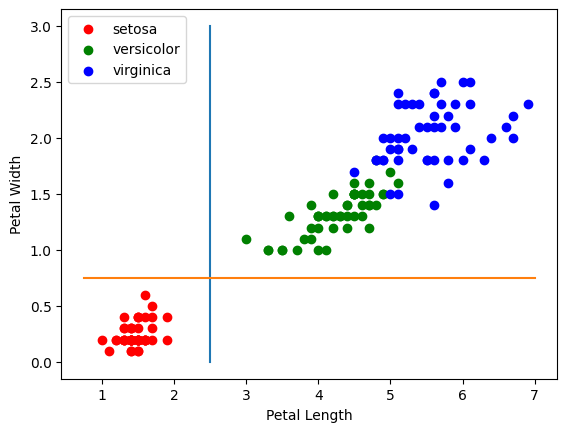

In [47]:
plot_2D()

# **Naive bayes**

In [48]:
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
nb.fit(irisData.data[:], irisData.target[:])

MultinomialNB()

In [49]:
p31 = nb.predict(irisData.data[[31]])
print (p31)
plast = nb.predict(irisData.data[[-1]])
print (plast)
p = nb.predict(irisData.data[:])
print (p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [50]:
nb1 = naive_bayes.MultinomialNB(fit_prior=True)
nb1.fit(irisData.data[:99], irisData.target[:99])
nb1.predict(irisData.data[100:149])


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

## ***model evaluation***

#### Performances sur l'ensemble d'apprentissage

In [51]:
print("method 1")
ea = 0
for i in range(len(irisData.data)):
  if (p[i] !=irisData.target[i]):
    ea = ea+1
print(f'error rate: {ea/len(irisData.data)}')

method 1
error rate: 0.04666666666666667


In [52]:
#Indice : pensez à exploiter le tableau P-Y : que représentent des valeurs non nulles ?
# Comment compter (en une seule instruction) le nombre de valeurs non-nulles1
# ?

print("method 2")
print(f'number of non null values : {len(np.nonzero(p-irisData.target)[0])}')
print(f'error rate : {len(np.nonzero(p-irisData.target)[0])/150}')

method 2
number of non null values : 7
error rate : 0.04666666666666667


In [53]:
print("method 3")
print(f'error rate : {1-nb.score(irisData.data,irisData.target)}')

method 3
error rate : 0.046666666666666634


nous avons évalué notre modele sur le training set

l'error sur le training set est de : 0.046

## **Performances en généralisation**

In [86]:
#question 1:
import random

def split(S, random_state=None, train_split=2/3, stratify=True):
    indexes = list(range(len(S.data)))

    random.seed(random_state)
    random.shuffle(indexes)

    if stratify:
        class_indices = {}
        for i, label in enumerate(S.target):
            if label not in class_indices:
                class_indices[label] = []
            class_indices[label].append(indexes[i])

        train_size_per_class = {label: int(train_split * len(indices)) for label, indices in class_indices.items()}

        train_indices = []
        test_indices = []
        for label in class_indices.keys():
                train_indices.extend(class_indices[label][:train_size_per_class[label]])
                test_indices.extend(class_indices[label][train_size_per_class[label]:])

    else:
        train_size = int(train_split * len(S.data))
        train_indices = indexes[:train_size]
        test_indices = indexes[train_size:]

    X_train = S.data[train_indices]
    y_train = S.target[train_indices]
    X_test = S.data[test_indices]
    y_test = S.target[test_indices]

    return X_train, y_train, X_test, y_test



In [87]:
X_train,y_train,X_test,y_test=split(irisData)

print(f'size of X_train: {len(X_train)} with shape : {X_train.shape}')
print(f'size of X_test : {len(X_test)} with shape : {X_test.shape}')
print(f'size of y_train: {len(y_train)} with shape : {y_train.shape}')
print(f'size of y_test : {len(y_test)} with shape : {y_test.shape}')


size of X_train: 99 with shape : (99, 4)
size of X_test : 51 with shape : (51, 4)
size of y_train: 99 with shape : (99,)
size of y_test : 51 with shape : (51,)


In [88]:
#question 2
def test(S,clf,train_split=2/3):
  X_train,y_train,X_test,y_test=split(S,train_split=train_split)
  clf.fit(X_train,y_train)

  predictions=clf.predict(X_test)
  error = len(np.nonzero(predictions-y_test)[0])/len(y_test)

  return error

In [89]:
clf = naive_bayes.MultinomialNB(fit_prior=True)
error_rate = test(irisData, clf)

print("Taux d'erreur estimé avec Naive Bayes en utilisant split:", error_rate)

Taux d'erreur estimé avec Naive Bayes en utilisant split: 0.43137254901960786


In [90]:
#question 3
def test_t(S, clf, t,train_split=2/3):
    error_rates = []
    for _ in range(t):
        error_rate = test(S, clf,train_split=train_split)
        error_rates.append(error_rate)
    mean_error = np.mean(error_rates)
    return mean_error, error_rates

In [91]:
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table2 = PrettyTable(['t', 'Mean Error'])

for t in ts:
    clf =  naive_bayes.MultinomialNB(fit_prior=True)
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, clf, t)
        mean_errors.append(mean_error)
    error_rate = np.mean(mean_errors)
    result_table2.add_row([t, f"{error_rate:.4f}"])

    print(f"Taux d'erreur moyen pour t={t}: {error_rate}")


Taux d'erreur moyen pour t=10: 0.19980392156862745
Taux d'erreur moyen pour t=50: 0.20050980392156864
Taux d'erreur moyen pour t=100: 0.20642156862745095
Taux d'erreur moyen pour t=200: 0.2072941176470588
Taux d'erreur moyen pour t=500: 0.20311960784313726
Taux d'erreur moyen pour t=1000: 0.2048117647058824


In [92]:
print(result_table2)

+------+------------+
|  t   | Mean Error |
+------+------------+
|  10  |   0.1998   |
|  50  |   0.2005   |
| 100  |   0.2064   |
| 200  |   0.2073   |
| 500  |   0.2031   |
| 1000 |   0.2048   |
+------+------------+


plus t augmente , plus l'erreur est stable ce qui nous renseigne sur l'erreur dans le cas general

In [93]:
#question 4
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table1 = PrettyTable(['t', 'Mean Error'])

for t in ts:
    clf =  naive_bayes.MultinomialNB(fit_prior=True)
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, clf, t,train_split=0.9)
        mean_errors.append(mean_error)
    error_rate = np.mean(mean_errors)
    result_table1.add_row([t, f"{error_rate:.4f}"])
    print(f"Taux d'erreur moyen pour t={t}: {error_rate}")
print(result_table1)

Taux d'erreur moyen pour t=10: 0.12533333333333332
Taux d'erreur moyen pour t=50: 0.11833333333333333
Taux d'erreur moyen pour t=100: 0.12193333333333337
Taux d'erreur moyen pour t=200: 0.12011666666666668
Taux d'erreur moyen pour t=500: 0.12313333333333334
Taux d'erreur moyen pour t=1000: 0.12332999999999998
+------+------------+
|  t   | Mean Error |
+------+------------+
|  10  |   0.1253   |
|  50  |   0.1183   |
| 100  |   0.1219   |
| 200  |   0.1201   |
| 500  |   0.1231   |
| 1000 |   0.1233   |
+------+------------+


on remarque que le taux d'error si on teste sur le 1/10 de l'echantillon diminue

In [94]:
#question 5
from sklearn.metrics import accuracy_score

test_sizes = [0.1,0.2, 0.25,0.3, 0.33, 0.4, 0.7]
result_table = PrettyTable(['Test Size', 'Error Rate'])
error_rates = []
for test_size in test_sizes:
    clf =  naive_bayes.MultinomialNB(fit_prior=True)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        irisData.data, irisData.target, test_size=test_size,stratify=irisData.target
    )
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, predictions)
    error_rates.append(error_rate)
    result_table.add_row([test_size, f"{error_rate:.4f}"])
    print(f"Test Size: {test_size}, error rate: {error_rate}")
print(result_table)

Test Size: 0.1, error rate: 0.1333333333333333
Test Size: 0.2, error rate: 0.033333333333333326
Test Size: 0.25, error rate: 0.07894736842105265
Test Size: 0.3, error rate: 0.0888888888888889
Test Size: 0.33, error rate: 0.020000000000000018
Test Size: 0.4, error rate: 0.06666666666666665
Test Size: 0.7, error rate: 0.03809523809523807
+-----------+------------+
| Test Size | Error Rate |
+-----------+------------+
|    0.1    |   0.1333   |
|    0.2    |   0.0333   |
|    0.25   |   0.0789   |
|    0.3    |   0.0889   |
|    0.33   |   0.0200   |
|    0.4    |   0.0667   |
|    0.7    |   0.0381   |
+-----------+------------+


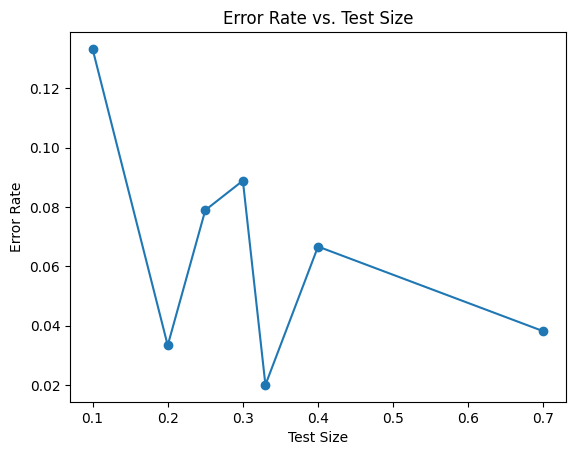

In [95]:
import matplotlib.pyplot as plt

plt.plot(test_sizes, error_rates, marker='o')
plt.title('Error Rate vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Error Rate')
plt.show()

## **Cross Validation**

In [96]:
clf =  naive_bayes.MultinomialNB(fit_prior=True)
num_folds = [2, 3, 5, 8, 10]
summary_table = PrettyTable(['Folds', 'Mean Error Rate'])
error_rates=[]
for folds in num_folds:
    scores = cross_val_score(clf, irisData.data, irisData.target, cv=folds)
    mean_error_rate = 1 - scores.mean()
    error_rates.append(mean_error_rate)
    summary_table.add_row([folds, f"{mean_error_rate:.4f}"])
print(summary_table)


+-------+-----------------+
| Folds | Mean Error Rate |
+-------+-----------------+
|   2   |      0.0467     |
|   3   |      0.0533     |
|   5   |      0.0467     |
|   8   |      0.0526     |
|   10  |      0.0467     |
+-------+-----------------+


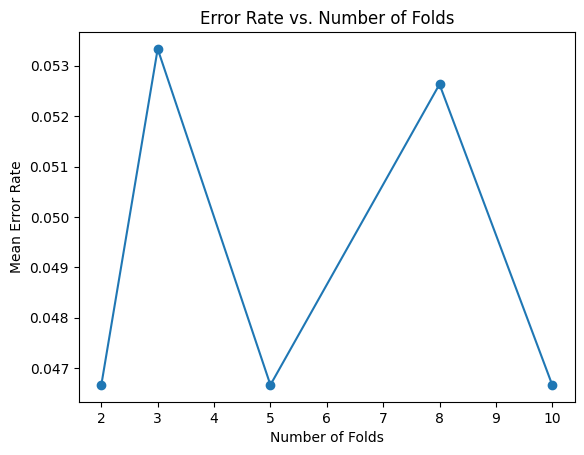

In [97]:
import matplotlib.pyplot as plt

plt.plot(num_folds, error_rates, marker='o')
plt.title('Error Rate vs. Number of Folds')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Error Rate')
plt.show()

In [98]:
pretty_tables=[summary_table,result_table,result_table1,result_table2]
titles=["cross validation","using train_test_split predefined method","test_split=0.1 with repetition","test_split=1/3 with repetition"]
for title,table in zip(titles,pretty_tables):
  print('---',title,'---')
  print(table)

--- cross validation ---
+-------+-----------------+
| Folds | Mean Error Rate |
+-------+-----------------+
|   2   |      0.0467     |
|   3   |      0.0533     |
|   5   |      0.0467     |
|   8   |      0.0526     |
|   10  |      0.0467     |
+-------+-----------------+
--- using train_test_split predefined method ---
+-----------+------------+
| Test Size | Error Rate |
+-----------+------------+
|    0.1    |   0.1333   |
|    0.2    |   0.0333   |
|    0.25   |   0.0789   |
|    0.3    |   0.0889   |
|    0.33   |   0.0200   |
|    0.4    |   0.0667   |
|    0.7    |   0.0381   |
+-----------+------------+
--- test_split=0.1 with repetition ---
+------+------------+
|  t   | Mean Error |
+------+------------+
|  10  |   0.1253   |
|  50  |   0.1183   |
| 100  |   0.1219   |
| 200  |   0.1201   |
| 500  |   0.1231   |
| 1000 |   0.1233   |
+------+------------+
--- test_split=1/3 with repetition ---
+------+------------+
|  t   | Mean Error |
+------+------------+
|  10  |   0.

#**Decision Tree**

In [99]:
model = DecisionTreeClassifier()# un algo d'apprentissage
model.fit(irisData.data[:], irisData.target[:])

DecisionTreeClassifier()

In [100]:
p31 = model.predict(irisData.data[[31]])
print (p31)
plast = model.predict(irisData.data[[-1]])
print (plast)
p = model.predict(irisData.data[:])
print (p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [101]:
model1 = DecisionTreeClassifier()
model1.fit(irisData.data[:99], irisData.target[:99])
model1.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

### **model evaluation**

In [102]:
print("method 1")
ea = 0
for i in range(len(irisData.data)):
  if (p[i] !=irisData.target[i]):
    ea = ea+1
print(f'error rate: {ea/len(irisData.data)}')

method 1
error rate: 0.0


In [103]:

#Indice : pensez à exploiter le tableau P-Y : que représentent des valeurs non nulles ?
# Comment compter (en une seule instruction) le nombre de valeurs non-nulles1
# ?

print("method 2")
print(f'number of non null values : {len(np.nonzero(p-irisData.target)[0])}')
print(f'error rate : {len(np.nonzero(p-irisData.target)[0])/150}')

method 2
number of non null values : 0
error rate : 0.0


In [104]:
print("method 3")
print(f'error rate : {1-model.score(irisData.data,irisData.target)}')

method 3
error rate : 0.0


we have trained our model with 150 instances and we have evaluated the model on the same training data , which makes sense to have a very low test error_rate (in this case 0%) since the model have seen all the data

# **Performances en généralisation**

In [105]:
model = DecisionTreeClassifier()
error_rate = test(irisData, model)

print("Taux d'erreur estimé avec Naive Bayes en utilisant split:", error_rate)

Taux d'erreur estimé avec Naive Bayes en utilisant split: 0.09803921568627451


In [106]:

ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table2 = PrettyTable(['t', 'Mean Error'])

for t in ts:
    model =  DecisionTreeClassifier()
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, model, t)
        mean_errors.append(mean_error)
    error_rate = np.mean(mean_errors)
    result_table2.add_row([t, f"{error_rate:.4f}"])

    print(f"Taux d'erreur moyen pour t={t}: {error_rate}")

Taux d'erreur moyen pour t=10: 0.05196078431372549
Taux d'erreur moyen pour t=50: 0.054705882352941174
Taux d'erreur moyen pour t=100: 0.05507843137254901
Taux d'erreur moyen pour t=200: 0.05461764705882353
Taux d'erreur moyen pour t=500: 0.05473529411764706
Taux d'erreur moyen pour t=1000: 0.05472450980392157


In [107]:
print(result_table2)

+------+------------+
|  t   | Mean Error |
+------+------------+
|  10  |   0.0520   |
|  50  |   0.0547   |
| 100  |   0.0551   |
| 200  |   0.0546   |
| 500  |   0.0547   |
| 1000 |   0.0547   |
+------+------------+


the error rate mean converges to 0.54 very quickly from the starting ts  

In [108]:
#question 4
ts = [10, 50, 100, 200, 500, 1000]
repetitions = 20
result_table1 = PrettyTable(['t', 'Mean Error'])

for t in ts:
    model =  DecisionTreeClassifier()
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, model, t,train_split=0.9)
        mean_errors.append(mean_error)
    error_rate = np.mean(mean_errors)
    result_table1.add_row([t, f"{error_rate:.4f}"])
    print(f"Taux d'erreur moyen pour t={t}: {error_rate}")
print(result_table1)

Taux d'erreur moyen pour t=10: 0.05566666666666666
Taux d'erreur moyen pour t=50: 0.05120000000000001
Taux d'erreur moyen pour t=100: 0.05449999999999999
Taux d'erreur moyen pour t=200: 0.053133333333333345
Taux d'erreur moyen pour t=500: 0.05293999999999999
Taux d'erreur moyen pour t=1000: 0.05272333333333333
+------+------------+
|  t   | Mean Error |
+------+------------+
|  10  |   0.0557   |
|  50  |   0.0512   |
| 100  |   0.0545   |
| 200  |   0.0531   |
| 500  |   0.0529   |
| 1000 |   0.0527   |
+------+------------+


In [109]:
#question 5
from sklearn.metrics import accuracy_score

test_sizes = [0.1,0.2, 0.25,0.3, 0.33, 0.4, 0.7]
result_table = PrettyTable(['Test Size', 'Error Rate'])
error_rates = []
for test_size in test_sizes:
    model =  DecisionTreeClassifier()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        irisData.data, irisData.target, test_size=test_size
    )
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, predictions)
    error_rates.append(error_rate)
    result_table.add_row([test_size, f"{error_rate:.4f}"])
    print(f"Test Size: {test_size}, error rate: {error_rate}")
print(result_table)

Test Size: 0.1, error rate: 0.0
Test Size: 0.2, error rate: 0.033333333333333326
Test Size: 0.25, error rate: 0.02631578947368418
Test Size: 0.3, error rate: 0.06666666666666665
Test Size: 0.33, error rate: 0.020000000000000018
Test Size: 0.4, error rate: 0.033333333333333326
Test Size: 0.7, error rate: 0.05714285714285716
+-----------+------------+
| Test Size | Error Rate |
+-----------+------------+
|    0.1    |   0.0000   |
|    0.2    |   0.0333   |
|    0.25   |   0.0263   |
|    0.3    |   0.0667   |
|    0.33   |   0.0200   |
|    0.4    |   0.0333   |
|    0.7    |   0.0571   |
+-----------+------------+


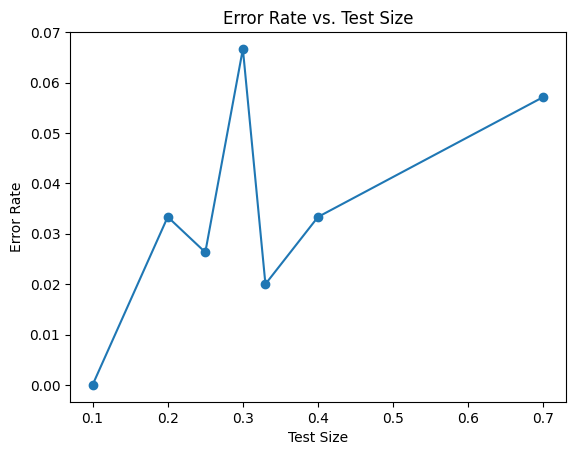

In [110]:
import matplotlib.pyplot as plt

plt.plot(test_sizes, error_rates, marker='o')
plt.title('Error Rate vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Error Rate')
plt.show()

## **Cross validation**

In [111]:
model =  DecisionTreeClassifier()
num_folds = [2, 3, 5, 8, 10]
summary_table = PrettyTable(['Folds', 'Mean Error Rate'])
error_rates=[]
for folds in num_folds:
    scores = cross_val_score(model, irisData.data, irisData.target, cv=folds)
    mean_error_rate = 1 - scores.mean()
    error_rates.append(mean_error_rate)
    summary_table.add_row([folds, f"{mean_error_rate:.4f}"])
print(summary_table)

+-------+-----------------+
| Folds | Mean Error Rate |
+-------+-----------------+
|   2   |      0.0467     |
|   3   |      0.0400     |
|   5   |      0.0333     |
|   8   |      0.0395     |
|   10  |      0.0400     |
+-------+-----------------+


In [112]:
pretty_tables=[summary_table,result_table,result_table1,result_table2]
titles=["cross validation","using train_test_split predefined method","test_split=0.1 with repetition","test_split=1/3 with repetition"]
for title,table in zip(titles,pretty_tables):
  print('---',title,'---')
  print(table)

--- cross validation ---
+-------+-----------------+
| Folds | Mean Error Rate |
+-------+-----------------+
|   2   |      0.0467     |
|   3   |      0.0400     |
|   5   |      0.0333     |
|   8   |      0.0395     |
|   10  |      0.0400     |
+-------+-----------------+
--- using train_test_split predefined method ---
+-----------+------------+
| Test Size | Error Rate |
+-----------+------------+
|    0.1    |   0.0000   |
|    0.2    |   0.0333   |
|    0.25   |   0.0263   |
|    0.3    |   0.0667   |
|    0.33   |   0.0200   |
|    0.4    |   0.0333   |
|    0.7    |   0.0571   |
+-----------+------------+
--- test_split=0.1 with repetition ---
+------+------------+
|  t   | Mean Error |
+------+------------+
|  10  |   0.0557   |
|  50  |   0.0512   |
| 100  |   0.0545   |
| 200  |   0.0531   |
| 500  |   0.0529   |
| 1000 |   0.0527   |
+------+------------+
--- test_split=1/3 with repetition ---
+------+------------+
|  t   | Mean Error |
+------+------------+
|  10  |   0.